In [1680]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [1682]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

### Read Dataset

In [1685]:
dataset_directory= "./datasets"
dataset_file = "estate.csv"
full_path = os.path.join(dataset_directory, dataset_file)

estate_df = pd.read_csv(full_path)
estate_df.head()

,İlan no,Son Güncelleme Tarihi,Konut Tipi,Oda + Salon Sayısı,Brüt / Net M2,Bulunduğu Kat,Bina Yaşı,Isınma Tipi,Kat Sayısı,Krediye Uygunluk,Eşya Durumu,Banyo Sayısı,Yapı Tipi,Yapının Durumu,Kullanım Durumu,Tapu Durumu,Aidat,Takas,Cephe,Kira Getirisi,Yakıt Tipi,Ada No,Parsel No,Yetkili Ofis,city,district,price
0,7000-4440,24-10-2024,Daire,4 + 1,179 m2 / 165 m2,1. Kat,16 Yaşında,Kombi,6 Katlı,Uygun,Eşyalı Değil,1.000,Betonarme,İkinci El,Kiracılı,Kat Mülkiyeti,2.300 TL,Hayır,"Kuzey, Batı",25.000 TL,Doğalgaz,46460.000,1.000,Evet,Ankara,Etimesgut,7.000.000 TL
1,150882-3,26-10-2024,Daire,3 + 1,125 m2 / 118 m2,6. Kat,12 Yaşında,Merkezi (Pay Ölçer),11 Katlı,Uygun,Eşyalı Değil,1.000,Betonarme,İkinci El,Boş,Kat Mülkiyeti,870 TL,Hayır,Güney,NaN,Doğalgaz,NaN,NaN,Evet,Ankara,Etimesgut,2.799.000 TL
2,2545-8110,30-10-2024,Daire,3 + 1,125 m2 / 120 m2,2. Kat,15 Yaşında,Kombi,3 Katlı,Uygun,Eşyalı Değil,1.000,Betonarme,İkinci El,Mülk Sahibi,Kat Mülkiyeti,NaN,Hayır,"Güney, Doğu",NaN,Doğalgaz,NaN,NaN,Evet,Ankara,Pursaklar,3.250.000 TL
3,2545-8004,30-10-2024,Daire,3 + 1,120 m2 / 115 m2,Yüksek Giriş,10 Yaşında,Kombi,3 Katlı,Uygun,Eşyalı Değil,1.000,Betonarme,İkinci El,Boş,Kat Mülkiyeti,NaN,Hayır,Doğu,NaN,Doğalgaz,NaN,NaN,NaN,Ankara,Pursaklar,2.490.000 TL
4,110538-3363,10-10-2024,Daire,3 + 1,150 m2 / 137 m2,8. Kat,10 Yaşında,Merkezi (Pay Ölçer),29 Katlı,Uygun,Eşyalı Değil,2.000,Betonarme,İkinci El,Mülk Sahibi,Kat Mülkiyeti,2.150 TL,NaN,"Güney, Doğu",NaN,Doğalgaz,63932.000,2.000,Evet,Ankara,Etimesgut,8.000.000 TL


### Explarotory Data Analysis

In [1688]:
estate_df.describe()

,Banyo Sayısı,Ada No,Parsel No
count,1494.000,166.000,145.000
mean,1.473,18272.657,121.000
std,0.644,25657.350,1333.734
min,1.000,0.000,0.000
25%,1.000,11.000,1.000
50%,1.000,5279.000,4.000
75%,2.000,27545.750,11.000
max,6.000,118322.000,16069.000


In [1690]:
estate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504 entries, 0 to 1503
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   İlan no                1504 non-null   object 
 1   Son Güncelleme Tarihi  1504 non-null   object 
 2   Konut Tipi             1504 non-null   object 
 3   Oda + Salon Sayısı     1504 non-null   object 
 4   Brüt / Net M2          1504 non-null   object 
 5   Bulunduğu Kat          1446 non-null   object 
 6   Bina Yaşı              1504 non-null   object 
 7   Isınma Tipi            1504 non-null   object 
 8   Kat Sayısı             1504 non-null   object 
 9   Krediye Uygunluk       1504 non-null   object 
 10  Eşya Durumu            1428 non-null   object 
 11  Banyo Sayısı           1494 non-null   float64
 12  Yapı Tipi              1247 non-null   object 
 13  Yapının Durumu         1281 non-null   object 
 14  Kullanım Durumu        1449 non-null   object 
 15  Tapu

In [1692]:
estate_df.replace("", np.nan, inplace=True)

In [1694]:
estate_df['price'].value_counts()

price
2.850.000 TL        25
3.500.000 TL        25
3.250.000 TL        22
4.250.000 TL        21
2.950.000 TL        20
3.100.000 TL        18
2.750.000 TL        17
5.250.000 TL        16
5.750.000 TL        15
3.200.000 TL        15
3.650.000 TL        14
2.900.000 TL        14
6.500.000 TL        14
3.150.000 TL        14
4.500.000 TL        14
2.550.000 TL        13
2.800.000 TL        13
2.500.000 TL        13
3.950.000 TL        12
3.000.000 TL        12
4.100.000 TL        12
2.300.000 TL        12
5.950.000 TL        12
2.700.000 TL        11
3.300.000 TL        11
5.500.000 TL        10
3.850.000 TL        10
4.950.000 TL        10
2.400.000 TL        10
3.600.000 TL        10
2.350.000 TL        10
4.750.000 TL        10
8.500.000 TL        10
3.450.000 TL         9
6.250.000 TL         9
3.050.000 TL         9
2.200.000 TL         9
2.650.000 TL         9
7.500.000 TL         9
4.350.000 TL         9
3.900.000 TL         9
6.100.000 TL         8
2.250.000 TL         8
2.600

#### Find Column Types

In [1697]:
numeric_columns = estate_df.select_dtypes(include=["float64","int64"]).columns
numeric_columns

Index(['Banyo Sayısı', 'Ada No', 'Parsel No'], dtype='object')

In [1699]:
categorical_columns = estate_df.select_dtypes(include=["object"]).columns
categorical_columns

Index(['İlan no', 'Son Güncelleme Tarihi', 'Konut Tipi', 'Oda + Salon Sayısı', 'Brüt / Net M2', 'Bulunduğu Kat', 'Bina Yaşı', 'Isınma Tipi', 'Kat Sayısı', 'Krediye Uygunluk', 'Eşya Durumu', 'Yapı Tipi', 'Yapının Durumu', 'Kullanım Durumu', 'Tapu Durumu', 'Aidat', 'Takas', 'Cephe', 'Kira Getirisi', 'Yakıt Tipi', 'Yetkili Ofis', 'city', 'district', 'price'], dtype='object')

#### Duplicate Values

In [1702]:
estate_df.duplicated().sum()

0

<Axes: xlabel='Banyo Sayısı', ylabel='Count'>

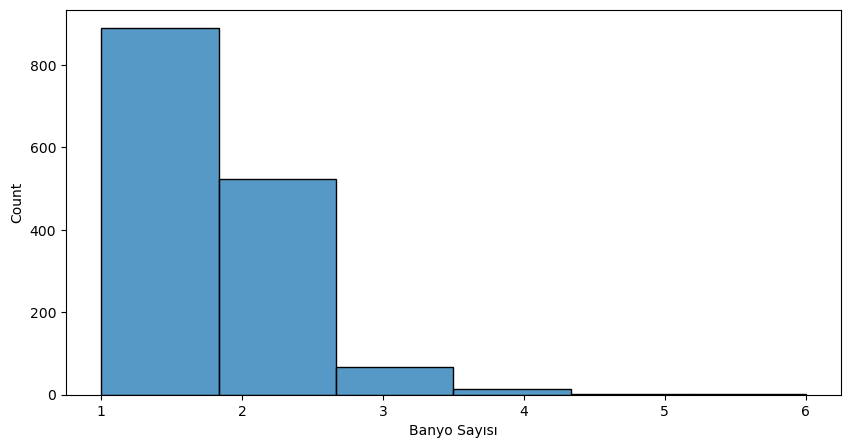

In [1704]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5), sharey=True)
sns.histplot(data=estate_df, bins=range(1, 7), x='Banyo Sayısı', binwidth=0.9)

In [1706]:
#ilan no veya id gibi kavramların prediction üzerinde etkileri yoktur o yüzden droplayabiliriz
estate_df = estate_df.drop(columns=["İlan no"])

In [1708]:
#Son güncelleme tarihi yerine ilk ilan tarihi datasetimizde olsaydı. Anlamlı bir özellik çıkartabilirdik. Son güncelleme tarihini droplayalım.
estate_df = estate_df.drop(columns=["Son Güncelleme Tarihi"])

In [1710]:
estate_df = estate_df.drop(columns=["Ada No"])

In [1712]:
estate_df = estate_df.drop(columns=["Parsel No"])

# estate_df = estate_df.drop(columns=["İlan no", "Son Güncelleme Tarihi", "Ada No", "Parsel No"])

In [1714]:
estate_df = estate_df.drop(columns=["city"])

In [1716]:
estate_df.head()

,Konut Tipi,Oda + Salon Sayısı,Brüt / Net M2,Bulunduğu Kat,Bina Yaşı,Isınma Tipi,Kat Sayısı,Krediye Uygunluk,Eşya Durumu,Banyo Sayısı,Yapı Tipi,Yapının Durumu,Kullanım Durumu,Tapu Durumu,Aidat,Takas,Cephe,Kira Getirisi,Yakıt Tipi,Yetkili Ofis,district,price
0,Daire,4 + 1,179 m2 / 165 m2,1. Kat,16 Yaşında,Kombi,6 Katlı,Uygun,Eşyalı Değil,1.000,Betonarme,İkinci El,Kiracılı,Kat Mülkiyeti,2.300 TL,Hayır,"Kuzey, Batı",25.000 TL,Doğalgaz,Evet,Etimesgut,7.000.000 TL
1,Daire,3 + 1,125 m2 / 118 m2,6. Kat,12 Yaşında,Merkezi (Pay Ölçer),11 Katlı,Uygun,Eşyalı Değil,1.000,Betonarme,İkinci El,Boş,Kat Mülkiyeti,870 TL,Hayır,Güney,NaN,Doğalgaz,Evet,Etimesgut,2.799.000 TL
2,Daire,3 + 1,125 m2 / 120 m2,2. Kat,15 Yaşında,Kombi,3 Katlı,Uygun,Eşyalı Değil,1.000,Betonarme,İkinci El,Mülk Sahibi,Kat Mülkiyeti,NaN,Hayır,"Güney, Doğu",NaN,Doğalgaz,Evet,Pursaklar,3.250.000 TL
3,Daire,3 + 1,120 m2 / 115 m2,Yüksek Giriş,10 Yaşında,Kombi,3 Katlı,Uygun,Eşyalı Değil,1.000,Betonarme,İkinci El,Boş,Kat Mülkiyeti,NaN,Hayır,Doğu,NaN,Doğalgaz,NaN,Pursaklar,2.490.000 TL
4,Daire,3 + 1,150 m2 / 137 m2,8. Kat,10 Yaşında,Merkezi (Pay Ölçer),29 Katlı,Uygun,Eşyalı Değil,2.000,Betonarme,İkinci El,Mülk Sahibi,Kat Mülkiyeti,2.150 TL,NaN,"Güney, Doğu",NaN,Doğalgaz,Evet,Etimesgut,8.000.000 TL


In [1718]:
estate_df.loc[estate_df["Isınma Tipi"] == "Merkezi (Pay Ölçer)", "Isınma Tipi"] = "Merkezi"

In [1720]:
estate_df[['Brüt m2', 'Net m2']] = estate_df['Brüt / Net M2'].str.split("/", expand=True).map(lambda x: int(x.replace(".", "").replace("m2", "").strip()))
estate_df = estate_df.drop(columns=['Brüt / Net M2'], axis=1)

In [1722]:
# oda ve salon farklı özellikler içerdiği için split yaparak target üzerindeki etkilerini ayrı ayrı ölçmek için
estate_df[['Oda Sayısı', 'Salon Sayısı']] = estate_df['Oda + Salon Sayısı'].str.split("+", expand=True).map(lambda x: int(x.strip()))
estate_df = estate_df.drop(columns=["Oda + Salon Sayısı"], axis=1)

In [1724]:
estate_df["Bina Yaşı"] = estate_df["Bina Yaşı"].apply(lambda x: 0 if x == "Sıfır Bina" else int(x.split()[0]))
estate_df["Bina Yaşı"].unique()

array([ 16,  12,  15,  10,   9,   4,  28,   0,  35,  25,  30,   5,   8,
        22,   2,   3,  20,  26,  11,  18,  45,  14,  13,  27,  33,  38,
        32,   1,   7,   6,  40,  23,  55,  21,  60,  42,  37,  29,  34,
       120,  17,  19,  24,  36,  31,  54,  56,  50,  39,  47,  46,  43,
        44,  41], dtype=int64)

In [1726]:
estate_df["Kat Sayısı"].unique()

array(['6 Katlı', '11 Katlı', '3 Katlı', '29 Katlı', '7 Katlı', '4 Katlı',
       '2 Katlı', '27 Katlı', '21 Katlı', '5 Katlı', '8 Katlı',
       '22 Katlı', '1 Katlı', '24 Katlı', '20 Katlı', '13 Katlı',
       '30 Katlı', '16 Katlı', '15 Katlı', '9 Katlı', '14 Katlı',
       '12 Katlı', '17 Katlı', '10 Katlı', '23 Katlı', '28 Katlı',
       '26 Katlı', '19 Katlı', '34 Katlı', '25 Katlı', '35 Katlı',
       '18 Katlı', '32 Katlı', '37 Katlı', '40 Katlı', '36 Katlı'],
      dtype=object)

In [1728]:
estate_df["Kat Sayısı"] = estate_df["Kat Sayısı"].apply(lambda x: int(x.split()[0]))
estate_df["Kat Sayısı"].unique()

array([ 6, 11,  3, 29,  7,  4,  2, 27, 21,  5,  8, 22,  1, 24, 20, 13, 30,
       16, 15,  9, 14, 12, 17, 10, 23, 28, 26, 19, 34, 25, 35, 18, 32, 37,
       40, 36], dtype=int64)

In [1730]:
estate_df["Bulunduğu Kat"].unique()

array(['1. Kat', '6. Kat', '2. Kat', 'Yüksek Giriş', '8. Kat',
       'Bahçe Katı', '3. Kat', 'Giriş Katı', 'Kot 1', 'En Üst Kat',
       '4. Kat', '21 ve üzeri', '14. Kat', nan, 'Zemin', '5. Kat',
       '13. Kat', 'Ara Kat', 'Teras Katı', 'Kot 2', '7. Kat', '11. Kat',
       '10. Kat', '16. Kat', '9. Kat', 'Bodrum', 'Kot 3', '12. Kat',
       '17. Kat', '20. Kat', '15. Kat', 'Çatı Katı', '19. Kat', '18. Kat',
       'Villa Katı'], dtype=object)

In [1732]:
def kat_donusturme(row):
    kat = row['Bulunduğu Kat']
    index_num = row.name
    
    if pd.isna(kat):
        return np.nan
    elif 'üzeri' in kat or kat in ['Teras Katı', 'Çatı Katı', 'En Üst Kat']:
        return estate_df["Kat Sayısı"][index_num]
    elif kat in ["Yüksek Giriş", "Giriş Katı", "Bahçe Katı", "Zemin"]:
        return 0
    elif kat == "Ara Kat":
        return estate_df["Kat Sayısı"][index_num] // 2
    elif 'Kot' in kat:
        return -1 * int(kat.split()[1])
    elif kat == 'Villa Katı':
        return 1
    elif "Kat" in kat:
        return int(kat.split(".")[0])
    elif "Bodrum" in kat:
        return -1

In [1734]:
estate_df['Bulunduğu Kat'] = estate_df.apply(kat_donusturme, axis=1)

In [1736]:
estate_df.head()

,Konut Tipi,Bulunduğu Kat,Bina Yaşı,Isınma Tipi,Kat Sayısı,Krediye Uygunluk,Eşya Durumu,Banyo Sayısı,Yapı Tipi,Yapının Durumu,Kullanım Durumu,Tapu Durumu,Aidat,Takas,Cephe,Kira Getirisi,Yakıt Tipi,Yetkili Ofis,district,price,Brüt m2,Net m2,Oda Sayısı,Salon Sayısı
0,Daire,1.000,16,Kombi,6,Uygun,Eşyalı Değil,1.000,Betonarme,İkinci El,Kiracılı,Kat Mülkiyeti,2.300 TL,Hayır,"Kuzey, Batı",25.000 TL,Doğalgaz,Evet,Etimesgut,7.000.000 TL,179,165,4,1
1,Daire,6.000,12,Merkezi,11,Uygun,Eşyalı Değil,1.000,Betonarme,İkinci El,Boş,Kat Mülkiyeti,870 TL,Hayır,Güney,NaN,Doğalgaz,Evet,Etimesgut,2.799.000 TL,125,118,3,1
2,Daire,2.000,15,Kombi,3,Uygun,Eşyalı Değil,1.000,Betonarme,İkinci El,Mülk Sahibi,Kat Mülkiyeti,NaN,Hayır,"Güney, Doğu",NaN,Doğalgaz,Evet,Pursaklar,3.250.000 TL,125,120,3,1
3,Daire,0.000,10,Kombi,3,Uygun,Eşyalı Değil,1.000,Betonarme,İkinci El,Boş,Kat Mülkiyeti,NaN,Hayır,Doğu,NaN,Doğalgaz,NaN,Pursaklar,2.490.000 TL,120,115,3,1
4,Daire,8.000,10,Merkezi,29,Uygun,Eşyalı Değil,2.000,Betonarme,İkinci El,Mülk Sahibi,Kat Mülkiyeti,2.150 TL,NaN,"Güney, Doğu",NaN,Doğalgaz,Evet,Etimesgut,8.000.000 TL,150,137,3,1


In [1738]:
# fiyat bilgilerini nümerik hale getirme
def convert_price(price_str, real_value=1):
    if isinstance(price_str, str):  
        price_str = price_str.replace(' TL', '').replace('.', '')
        if len(price_str) < 3:
            return int(price_str) * real_value
        return int(price_str)
    return np.nan 

In [1740]:
estate_df["Aidat"].unique()

array(['2.300 TL', '870 TL', nan, '2.150 TL', '150 TL', '250 TL',
       '100 TL', '300 TL', '200 TL', '50 TL', '1.500 TL', '2.000 TL',
       '2.100 TL', '600 TL', '1.000 TL', '500 TL', '2.500 TL', '80 TL',
       '350 TL', '700 TL', '1.600 TL', '1.140 TL', '70 TL', '750 TL',
       '1.800 TL', '30 TL', '650 TL', '800 TL', '1.250 TL', '900 TL',
       '3.500 TL', '950 TL', '75 TL', '1.550 TL', '3.000 TL', '1.200 TL',
       '850 TL', '50.000 TL', '10 TL', '1 TL', '400 TL', '3.100 TL',
       '1.650 TL', '6.900 TL', '60 TL', '4 TL', '5.100 TL', '1.350 TL',
       '240 TL', '1.5 TL', '855 TL', '4.000 TL', '1.700 TL', '2.5 TL',
       '420 TL', '12.727 TL', '2 TL', '2.230 TL', '450 TL', '1.300 TL',
       '170 TL', '2.450 TL', '2.200 TL', '2.400 TL', '1.450 TL',
       '1.064 TL', '220 TL', '25 TL', '1.100 TL', '120 TL', '830 TL',
       '1.3 TL', '4.500 TL', '2.3 TL', '2.193 TL', '1.844 TL', '4.950 TL',
       '1.050 TL', '1.015 TL', '2.750 TL', '6.800 TL', '5.000 TL',
       '2.55 TL',

In [1742]:
estate_df["Kira Getirisi"].unique()

array(['25.000 TL', nan, '20.000 TL', '15.000 TL', '16.000 TL',
       '17.000 TL', '45.000 TL', '18.000 TL', '28.000 TL', '35.000 TL',
       '10.000 TL', '7.000 TL', '60.000 TL', '50.000 TL', '17.500 TL',
       '30.000 TL', '150.000 TL', '32.500 TL', '40.000 TL', '19.000 TL',
       '65.000 TL', '12.000 TL', '27.000 TL', '46 TL', '32.000 TL',
       '70.000 TL', '22.000 TL', '8.000 TL', '13.000 TL', '14.000 TL',
       '24.000 TL', '21.000 TL', '23.000 TL', '8.500 TL', '3.500 TL',
       '13.750 TL', '75.000 TL', '37.000 TL', '6.000 TL', '55.000 TL',
       '7.500 TL', '23.500 TL', '180.000 TL', '22.500 TL', '12.500 TL',
       '16.500 TL', '11.500 TL', '550 TL', '3.000 TL', '27.500 TL',
       '5.000 TL', '100 TL', '21.500 TL', '14.500 TL', '18.500 TL',
       '25 TL', '26.000 TL', '42.000 TL', '25.500 TL', '100.000 TL',
       '33.000 TL', '6.750 TL', '62.000 TL'], dtype=object)

In [1744]:
filtered_df = estate_df[estate_df['price'].str.len() < 5]
len(filtered_df)

0

In [1746]:
estate_df["Aidat"] = estate_df["Aidat"].apply(lambda x: convert_price(x, real_value=100))
estate_df["Kira Getirisi"] = estate_df["Kira Getirisi"].apply(lambda x: convert_price(x, real_value=1000))
estate_df["price"] = estate_df["price"].apply(lambda x: convert_price(x))

In [1748]:
estate_df.head()

,Konut Tipi,Bulunduğu Kat,Bina Yaşı,Isınma Tipi,Kat Sayısı,Krediye Uygunluk,Eşya Durumu,Banyo Sayısı,Yapı Tipi,Yapının Durumu,Kullanım Durumu,Tapu Durumu,Aidat,Takas,Cephe,Kira Getirisi,Yakıt Tipi,Yetkili Ofis,district,price,Brüt m2,Net m2,Oda Sayısı,Salon Sayısı
0,Daire,1.000,16,Kombi,6,Uygun,Eşyalı Değil,1.000,Betonarme,İkinci El,Kiracılı,Kat Mülkiyeti,2300.000,Hayır,"Kuzey, Batı",25000.000,Doğalgaz,Evet,Etimesgut,7000000,179,165,4,1
1,Daire,6.000,12,Merkezi,11,Uygun,Eşyalı Değil,1.000,Betonarme,İkinci El,Boş,Kat Mülkiyeti,870.000,Hayır,Güney,NaN,Doğalgaz,Evet,Etimesgut,2799000,125,118,3,1
2,Daire,2.000,15,Kombi,3,Uygun,Eşyalı Değil,1.000,Betonarme,İkinci El,Mülk Sahibi,Kat Mülkiyeti,NaN,Hayır,"Güney, Doğu",NaN,Doğalgaz,Evet,Pursaklar,3250000,125,120,3,1
3,Daire,0.000,10,Kombi,3,Uygun,Eşyalı Değil,1.000,Betonarme,İkinci El,Boş,Kat Mülkiyeti,NaN,Hayır,Doğu,NaN,Doğalgaz,NaN,Pursaklar,2490000,120,115,3,1
4,Daire,8.000,10,Merkezi,29,Uygun,Eşyalı Değil,2.000,Betonarme,İkinci El,Mülk Sahibi,Kat Mülkiyeti,2150.000,NaN,"Güney, Doğu",NaN,Doğalgaz,Evet,Etimesgut,8000000,150,137,3,1


### Explarotory Data Analysis after new columns

In [1750]:
estate_df.describe()

,Bulunduğu Kat,Bina Yaşı,Kat Sayısı,Banyo Sayısı,Aidat,Kira Getirisi,price,Brüt m2,Net m2,Oda Sayısı,Salon Sayısı
count,1446.000,1504.000,1504.000,1494.000,859.000,852.000,1504.000,1504.000,1504.000,1504.000,1504.000
mean,2.769,14.314,5.767,1.473,1021.644,24179.167,6220512.461,150.003,133.297,3.088,1.013
std,3.711,12.550,5.260,0.644,2350.530,13126.929,60622196.946,83.836,68.940,1.000,0.196
min,-3.000,0.000,1.000,1.000,100.000,100.000,19750.000,40.000,35.000,1.000,0.000
25%,1.000,3.000,3.000,1.000,100.000,17000.000,2650000.000,115.000,100.000,3.000,1.000
50%,2.000,13.000,4.000,1.000,250.000,20000.000,3492500.000,130.000,120.000,3.000,1.000
75%,3.000,25.000,6.000,2.000,862.500,30000.000,5312500.000,160.000,145.000,3.000,1.000
max,40.000,120.000,40.000,6.000,50000.000,180000.000,2350000000.000,1600.000,1500.000,13.000,4.000


In [1752]:
estate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504 entries, 0 to 1503
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Konut Tipi        1504 non-null   object 
 1   Bulunduğu Kat     1446 non-null   float64
 2   Bina Yaşı         1504 non-null   int64  
 3   Isınma Tipi       1504 non-null   object 
 4   Kat Sayısı        1504 non-null   int64  
 5   Krediye Uygunluk  1504 non-null   object 
 6   Eşya Durumu       1428 non-null   object 
 7   Banyo Sayısı      1494 non-null   float64
 8   Yapı Tipi         1247 non-null   object 
 9   Yapının Durumu    1281 non-null   object 
 10  Kullanım Durumu   1449 non-null   object 
 11  Tapu Durumu       1431 non-null   object 
 12  Aidat             859 non-null    float64
 13  Takas             1373 non-null   object 
 14  Cephe             1402 non-null   object 
 15  Kira Getirisi     852 non-null    float64
 16  Yakıt Tipi        1301 non-null   object 


In [1754]:
missing_values = estate_df.isnull().sum()
print(missing_values)

Konut Tipi            0
Bulunduğu Kat        58
Bina Yaşı             0
Isınma Tipi           0
Kat Sayısı            0
Krediye Uygunluk      0
Eşya Durumu          76
Banyo Sayısı         10
Yapı Tipi           257
Yapının Durumu      223
Kullanım Durumu      55
Tapu Durumu          73
Aidat               645
Takas               131
Cephe               102
Kira Getirisi       652
Yakıt Tipi          203
Yetkili Ofis        303
district              0
price                 0
Brüt m2               0
Net m2                0
Oda Sayısı            0
Salon Sayısı          0
dtype: int64


In [1756]:
numeric_columns = estate_df.select_dtypes(include=["float64","int64"]).columns
numeric_columns

Index(['Bulunduğu Kat', 'Bina Yaşı', 'Kat Sayısı', 'Banyo Sayısı', 'Aidat', 'Kira Getirisi', 'price', 'Brüt m2', 'Net m2', 'Oda Sayısı', 'Salon Sayısı'], dtype='object')

In [1758]:
categorical_columns = estate_df.select_dtypes(include=["object"]).columns
categorical_columns

Index(['Konut Tipi', 'Isınma Tipi', 'Krediye Uygunluk', 'Eşya Durumu', 'Yapı Tipi', 'Yapının Durumu', 'Kullanım Durumu', 'Tapu Durumu', 'Takas', 'Cephe', 'Yakıt Tipi', 'Yetkili Ofis', 'district'], dtype='object')

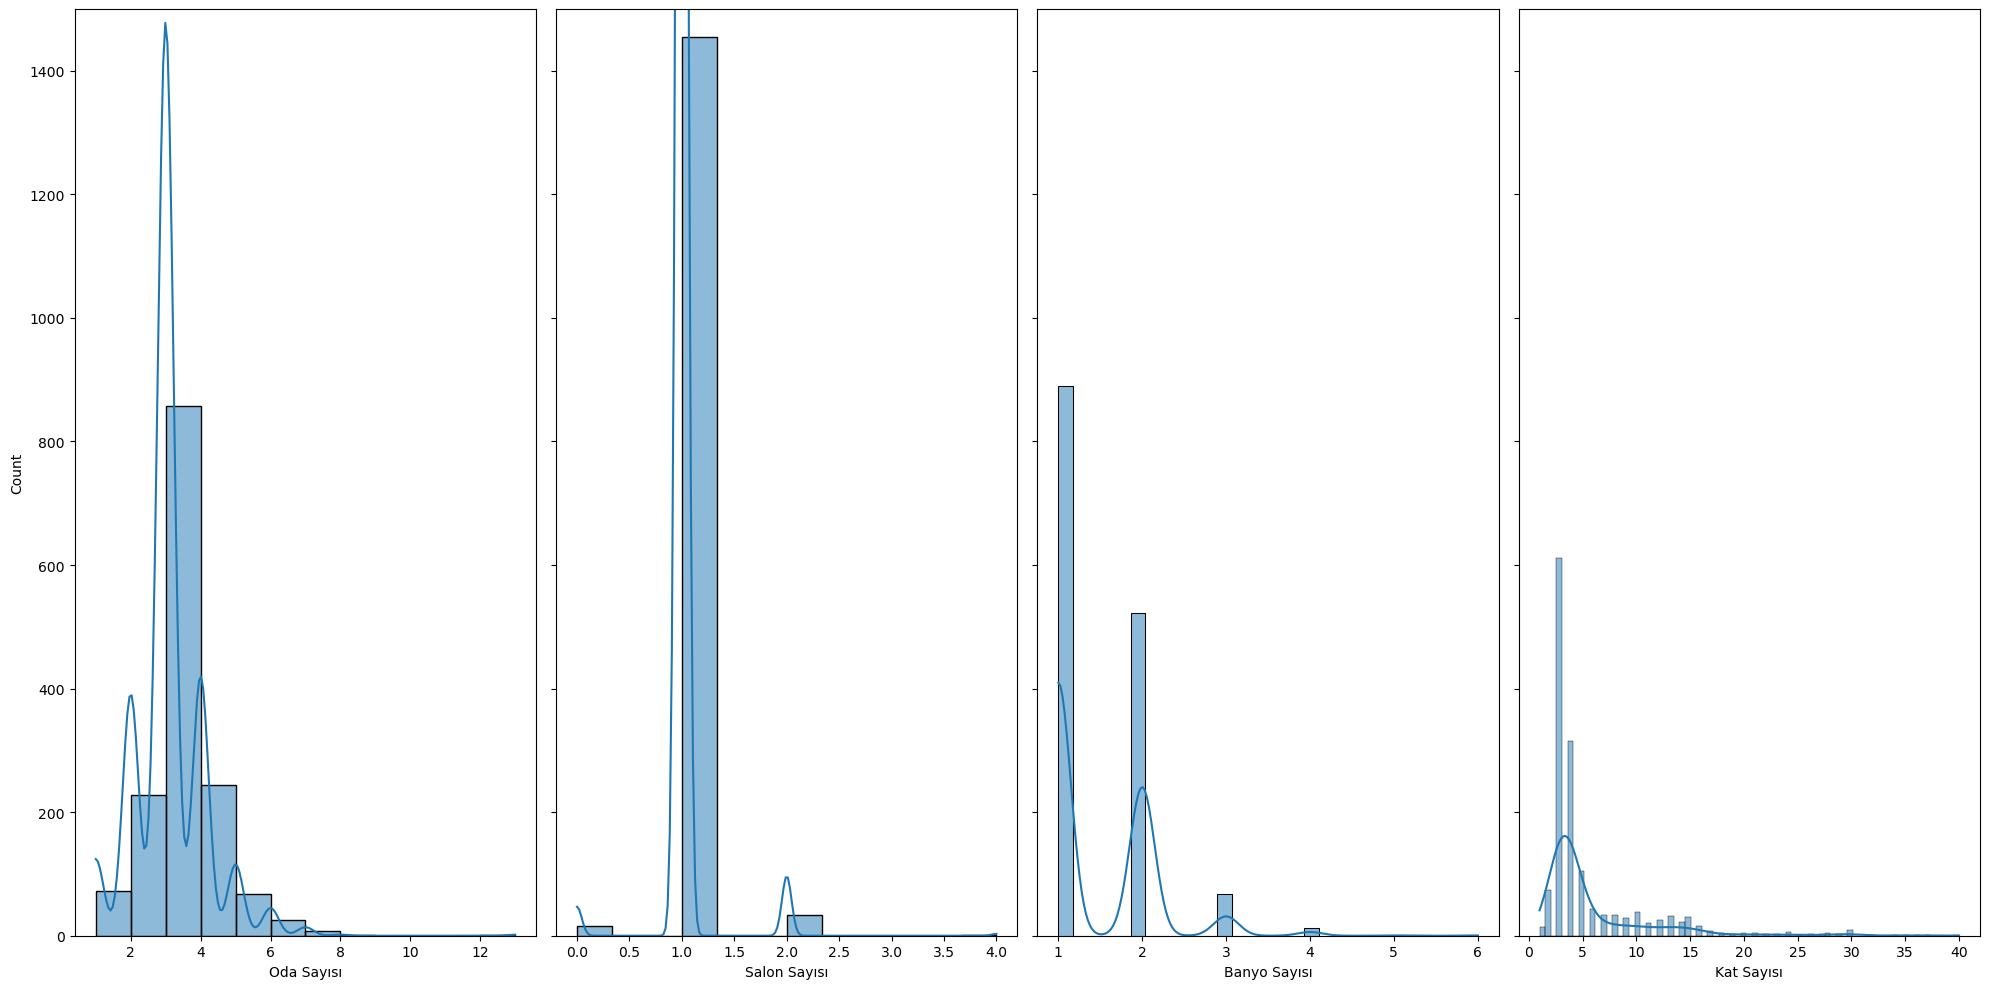

In [1760]:
big_range_col = ["Oda Sayısı", "Salon Sayısı", "Banyo Sayısı", "Kat Sayısı"]
fig, axes = plt.subplots(1, 4, figsize=(20, 10), sharey=True)
for i, feature in enumerate(big_range_col):
    hist_plot = sns.histplot(data=estate_df, x=feature, ax=axes[i], kde=True)
    hist_plot.set_ylim(0, 1500)
plt.subplots_adjust(hspace=0.5)
plt.tight_layout() 
plt.show()

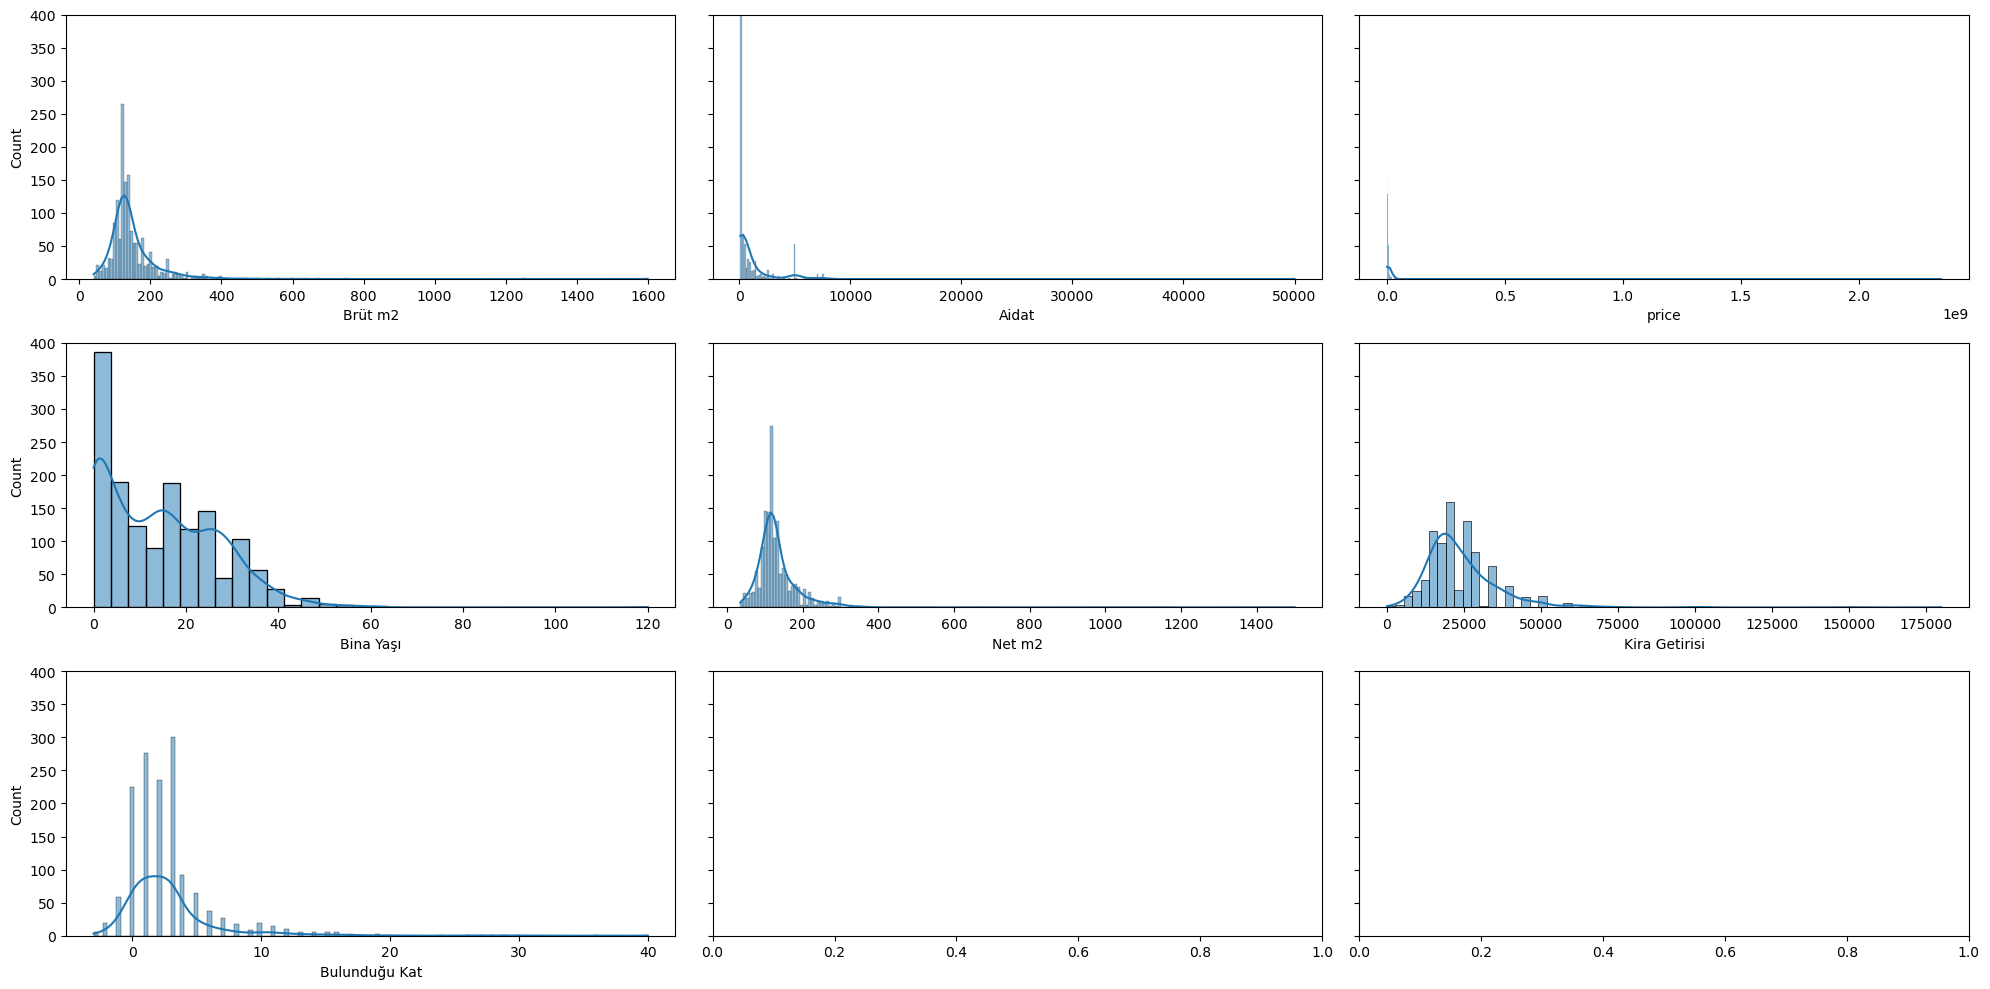

In [1761]:
low_range_col = list(set(numeric_columns) - set(big_range_col))

fig, axes = plt.subplots(3, 3, figsize=(20, 10), sharey=True)

for i, feature in enumerate(low_range_col):
    row = i // 3
    col = i % 3
    hist_plot = sns.histplot(data=estate_df, x=feature, ax=axes[row, col], kde=True)
    hist_plot.set_ylim(0, 400)

plt.subplots_adjust(hspace=0.5)
plt.tight_layout() 
plt.show()

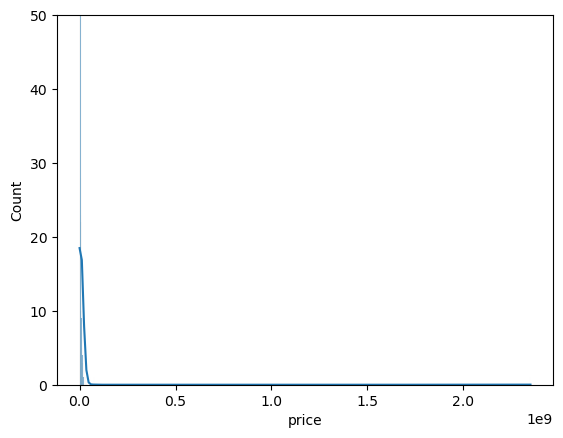

In [1763]:
hist_plot = sns.histplot(data=estate_df, x="price",  kde=True)
hist_plot.set_ylim(0, 50)
plt.show()

C:\Users\hasan\AppData\Local\Temp\ipykernel_8448\4099708100.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45)
C:\Users\hasan\AppData\Local\Temp\ipykernel_8448\4099708100.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45)
C:\Users\hasan\AppData\Local\Temp\ipykernel_8448\4099708100.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45)
C:\Users\hasan\AppData\Local\Temp\ipykernel_8448\4099708100.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using 

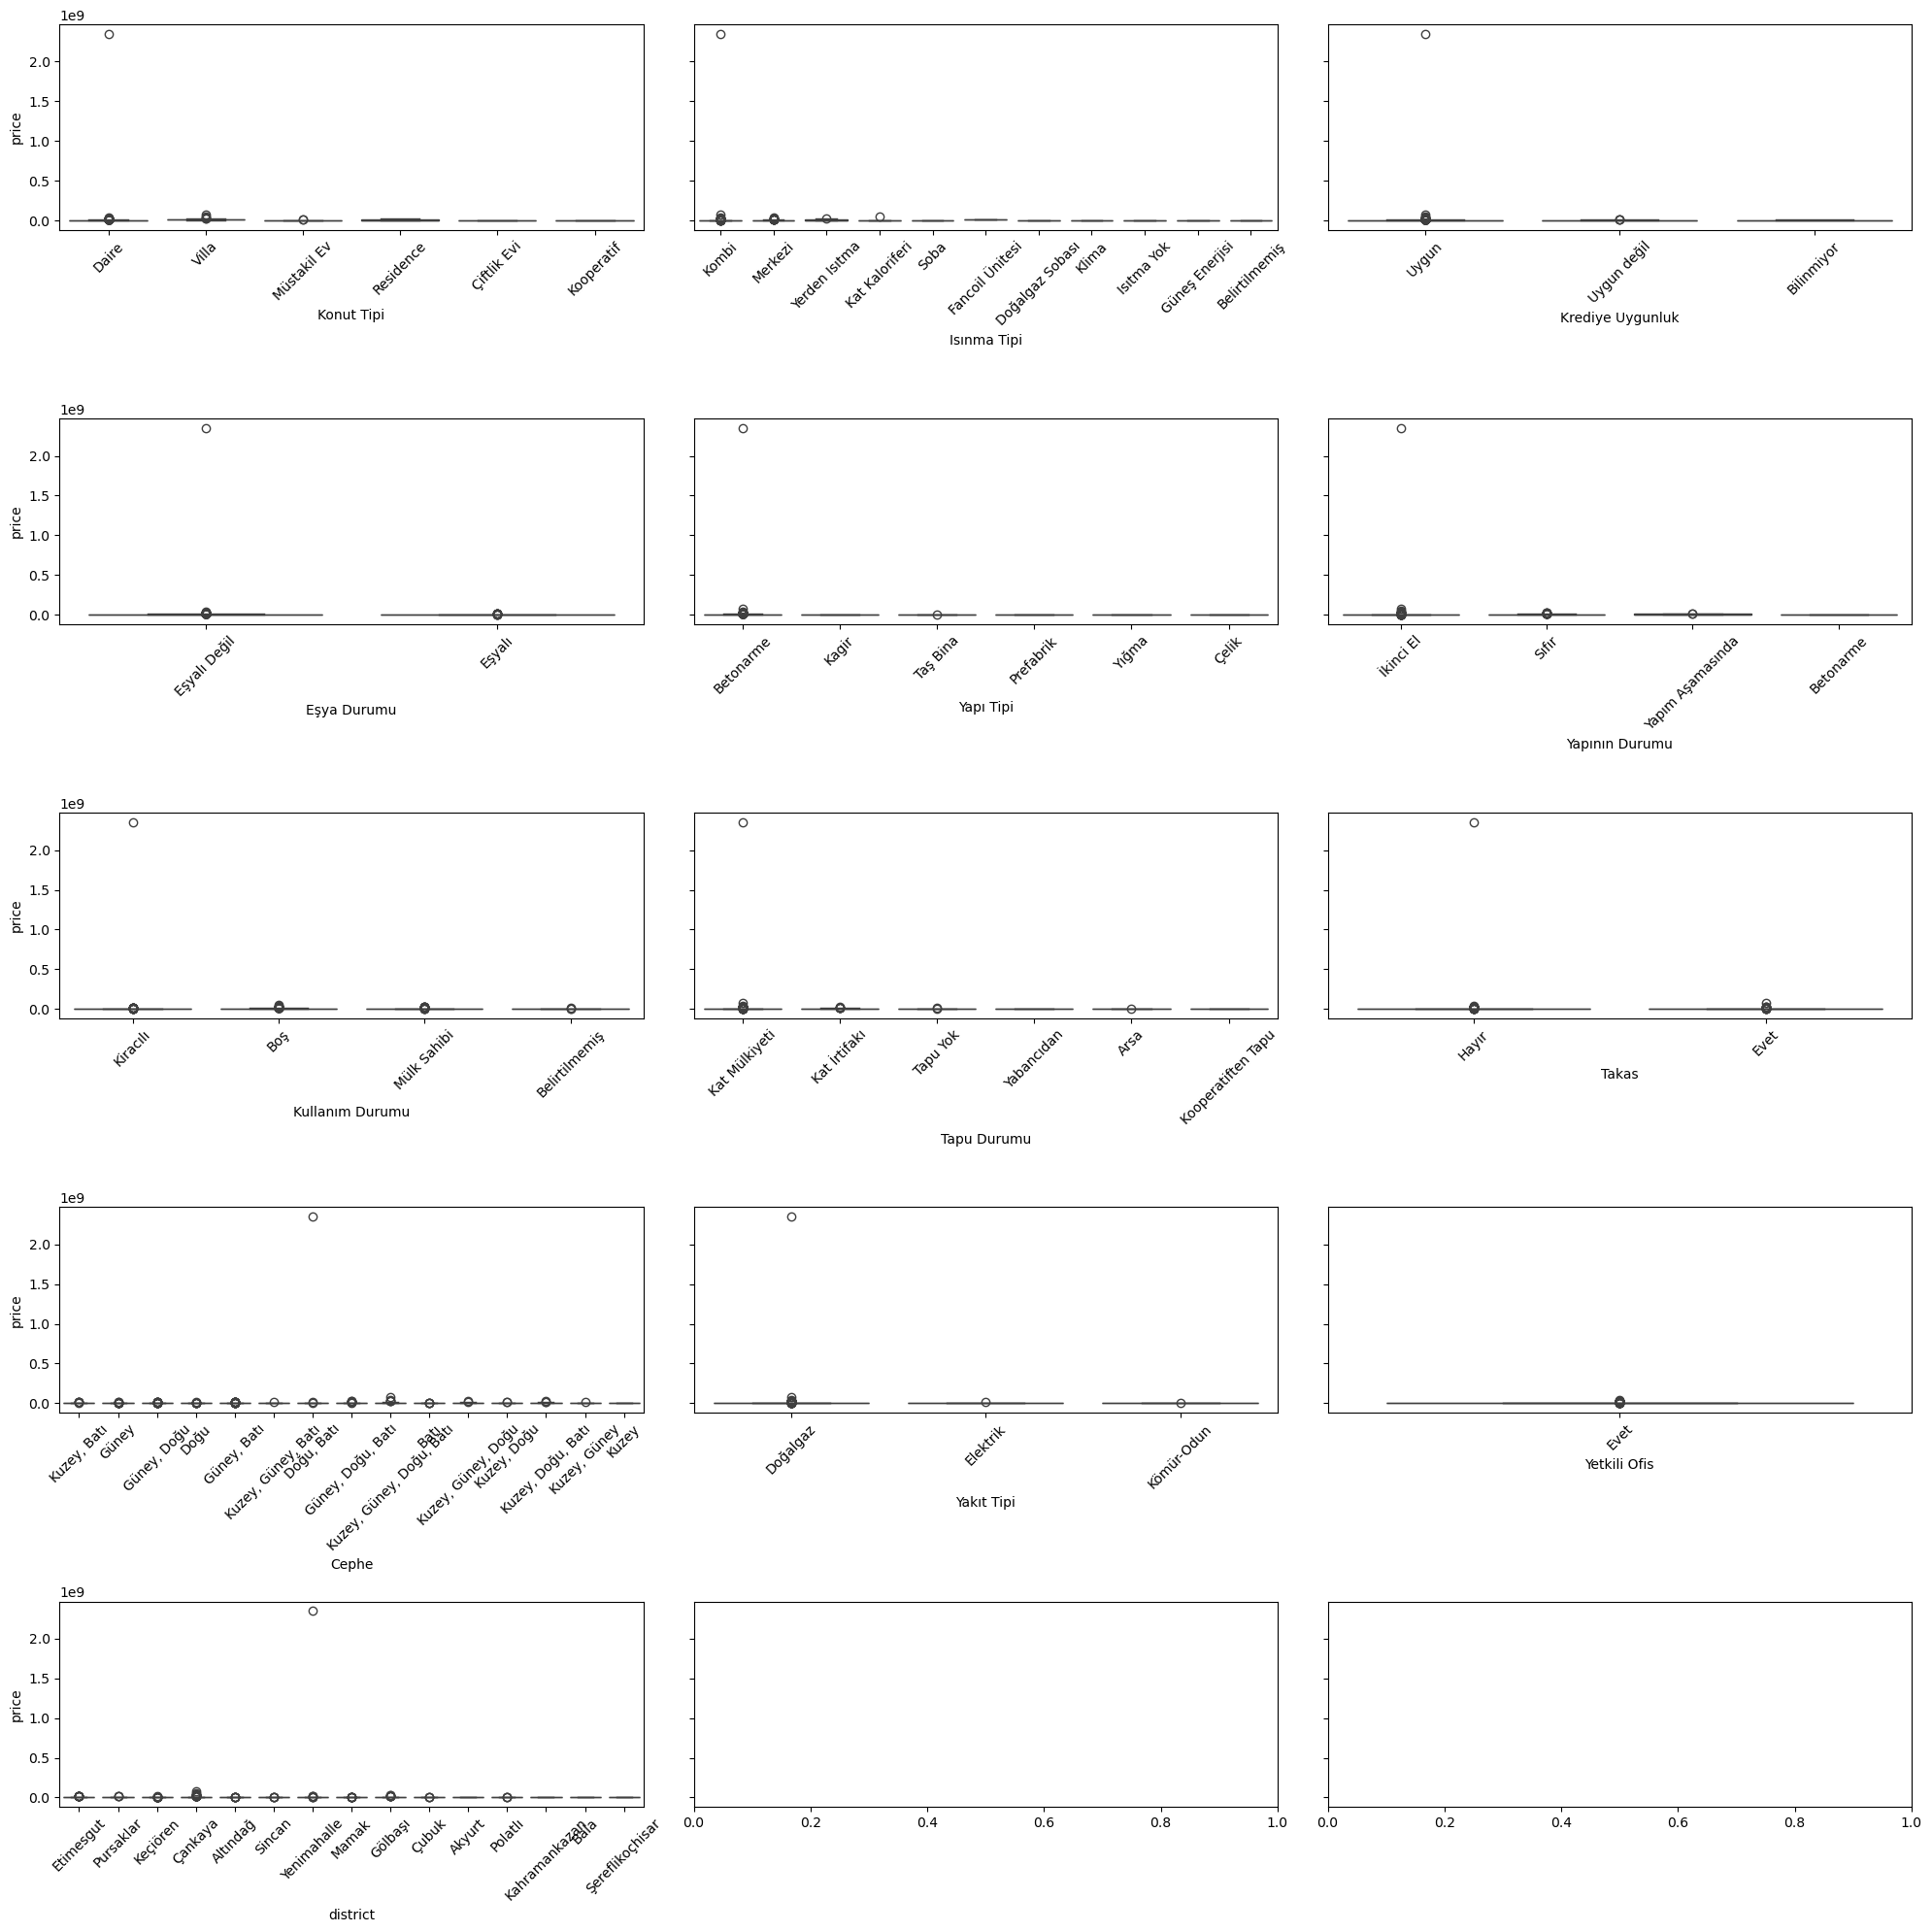

In [1764]:
fig, axes = plt.subplots(5, 3, figsize=(20, 20), sharey=True)
for i, feature in enumerate(categorical_columns):
    row = i // 3 
    col = i % 3
    sns.boxplot(data=estate_df, x=feature, y="price", ax=axes[row, col])
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45)

plt.subplots_adjust(hspace=0.5)
plt.tight_layout() 
plt.show()


In [1768]:
correlation_matrix = estate_df[numeric_columns].corr()
# price ile diğer değişkenler arasındaki korelasyonu alma
price_correlation = correlation_matrix['price'].sort_values(ascending=False)
price_correlation

price           1.000
Kira Getirisi   0.779
Aidat           0.047
Bulunduğu Kat   0.037
Net m2          0.037
Brüt m2         0.035
Oda Sayısı      0.033
Bina Yaşı       0.030
Kat Sayısı      0.025
Banyo Sayısı    0.020
Salon Sayısı    0.014
Name: price, dtype: float64

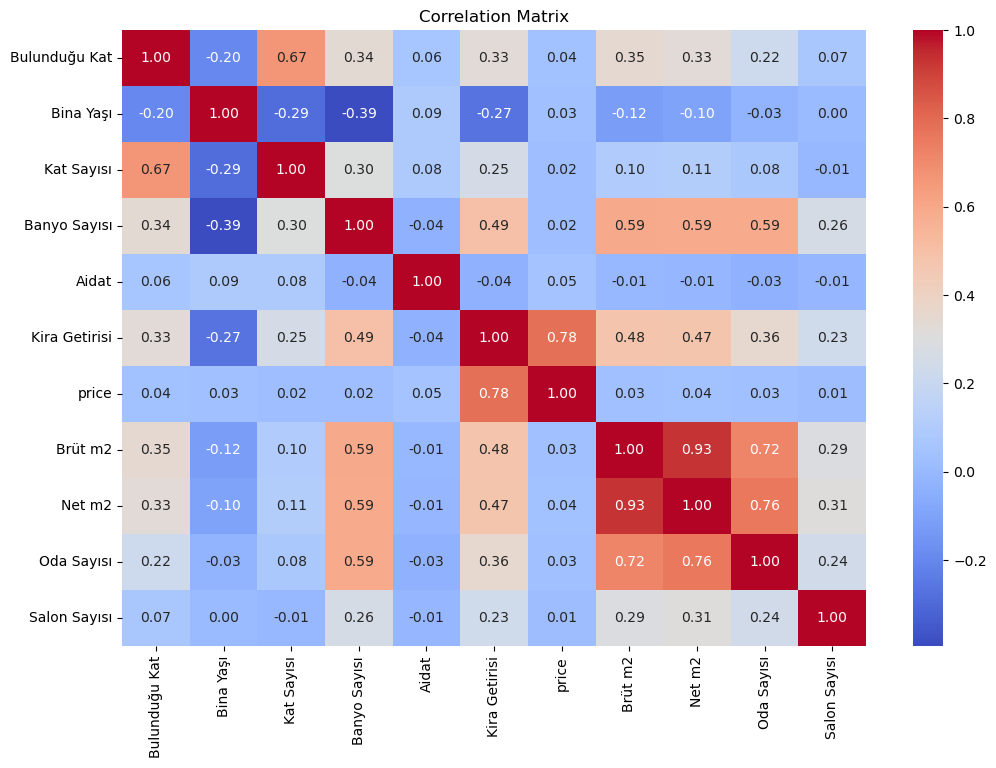

In [1770]:
#correlation matrix

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Data Cleaning

In [1772]:
missing_values = estate_df.isnull().sum()
print(missing_values)

Konut Tipi            0
Bulunduğu Kat        58
Bina Yaşı             0
Isınma Tipi           0
Kat Sayısı            0
Krediye Uygunluk      0
Eşya Durumu          76
Banyo Sayısı         10
Yapı Tipi           257
Yapının Durumu      223
Kullanım Durumu      55
Tapu Durumu          73
Aidat               645
Takas               131
Cephe               102
Kira Getirisi       652
Yakıt Tipi          203
Yetkili Ofis        303
district              0
price                 0
Brüt m2               0
Net m2                0
Oda Sayısı            0
Salon Sayısı          0
dtype: int64


In [1774]:
estate_df["Yetkili Ofis"] = estate_df["Yetkili Ofis"].fillna("Hayır")

In [1776]:
# fill categorical missing values
def fill_mode(group):
    mode_value = group.mode()
    if not mode_value.empty:
        return group.fillna(mode_value[0])
    else:
        return group.fillna(1)

In [1778]:
estate_df['Eşya Durumu'] = estate_df.groupby('district')['Eşya Durumu'].transform(fill_mode)
estate_df['Banyo Sayısı'] = estate_df.groupby('district')['Banyo Sayısı'].transform(fill_mode)
estate_df['Yapı Tipi'] = estate_df.groupby('district')['Yapı Tipi'].transform(fill_mode)
estate_df["Takas"] = estate_df.groupby('district')['Takas'].transform(fill_mode)

In [1780]:
estate_df["Yakıt Tipi"].unique()

array(['Doğalgaz', nan, 'Elektrik', 'Kömür-Odun'], dtype=object)

In [1782]:
estate_df["Isınma Tipi"].unique()

array(['Kombi', 'Merkezi', 'Yerden Isıtma', 'Kat Kaloriferi', 'Soba',
       'Fancoil Ünitesi', 'Doğalgaz Sobası', 'Klima', 'Isıtma Yok',
       'Güneş Enerjisi', 'Belirtilmemiş'], dtype=object)

In [1788]:
estate_df.loc[
    (estate_df["Yakıt Tipi"].isnull()) & 
    (estate_df["Isınma Tipi"].isin(['Kombi', 'Merkezi', 'Yerden Isıtma', 'Kat Kaloriferi', 'Doğalgaz Sobası'])), 
    "Yakıt Tipi"
] = "Doğalgaz"

estate_df.loc[
    (estate_df["Yakıt Tipi"].isnull()) & 
    (estate_df["Isınma Tipi"] == "Soba"), 
    "Yakıt Tipi"
] = "Kömür-Odun"

estate_df.loc[
    (estate_df["Yakıt Tipi"].isnull()) & 
    (estate_df["Isınma Tipi"].isin(["Güneş Enerjisi", "Klima"])), 
    "Yakıt Tipi"
] = "Elektrik"

In [1790]:
estate_df["Yapının Durumu"].unique()

array(['İkinci El', 'Sıfır', nan, 'Yapım Aşamasında', 'Betonarme'],
      dtype=object)

In [1792]:
estate_df["Kullanım Durumu"].unique()

array(['Kiracılı', 'Boş', 'Mülk Sahibi', 'Belirtilmemiş', nan],
      dtype=object)

In [1794]:
estate_df.loc[
    (estate_df["Yapının Durumu"].isnull()) & 
    (estate_df["Kullanım Durumu"].isin(['Kiracılı', "Mülk Sahibi"])), 
    "Yapının Durumu"
] = "İkinci El"

In [1796]:
estate_df.head()

,Konut Tipi,Bulunduğu Kat,Bina Yaşı,Isınma Tipi,Kat Sayısı,Krediye Uygunluk,Eşya Durumu,Banyo Sayısı,Yapı Tipi,Yapının Durumu,Kullanım Durumu,Tapu Durumu,Aidat,Takas,Cephe,Kira Getirisi,Yakıt Tipi,Yetkili Ofis,district,price,Brüt m2,Net m2,Oda Sayısı,Salon Sayısı
0,Daire,1.000,16,Kombi,6,Uygun,Eşyalı Değil,1.000,Betonarme,İkinci El,Kiracılı,Kat Mülkiyeti,2300.000,Hayır,"Kuzey, Batı",25000.000,Doğalgaz,Evet,Etimesgut,7000000,179,165,4,1
1,Daire,6.000,12,Merkezi,11,Uygun,Eşyalı Değil,1.000,Betonarme,İkinci El,Boş,Kat Mülkiyeti,870.000,Hayır,Güney,NaN,Doğalgaz,Evet,Etimesgut,2799000,125,118,3,1
2,Daire,2.000,15,Kombi,3,Uygun,Eşyalı Değil,1.000,Betonarme,İkinci El,Mülk Sahibi,Kat Mülkiyeti,NaN,Hayır,"Güney, Doğu",NaN,Doğalgaz,Evet,Pursaklar,3250000,125,120,3,1
3,Daire,0.000,10,Kombi,3,Uygun,Eşyalı Değil,1.000,Betonarme,İkinci El,Boş,Kat Mülkiyeti,NaN,Hayır,Doğu,NaN,Doğalgaz,Hayır,Pursaklar,2490000,120,115,3,1
4,Daire,8.000,10,Merkezi,29,Uygun,Eşyalı Değil,2.000,Betonarme,İkinci El,Mülk Sahibi,Kat Mülkiyeti,2150.000,Hayır,"Güney, Doğu",NaN,Doğalgaz,Evet,Etimesgut,8000000,150,137,3,1


In [1798]:
estate_df['Cephe'] = estate_df['Cephe'].fillna("Bilinmeyen Cephe")
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(', '), lowercase=False)
cephe_counts = vectorizer.fit_transform(estate_df['Cephe'])
cephe_counts

C:\Users\hasan\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<1504x5 sparse matrix of type '<class 'numpy.int64'>'
	with 3182 stored elements in Compressed Sparse Row format>

In [1800]:
cephe_counts_df = pd.DataFrame(cephe_counts.toarray(), columns=vectorizer.get_feature_names_out())
cephe_counts_df.head()

,Batı,Bilinmeyen Cephe,Doğu,Güney,Kuzey
0,1,0,0,0,1
1,0,0,0,1,0
2,0,0,1,1,0
3,0,0,1,0,0
4,0,0,1,1,0


In [1802]:
# Sonuçları bir DataFrame'e çevirme

# Yeni DataFrame'i orijinal veri çerçevesine ekleme
estate_df = pd.concat([estate_df, cephe_counts_df], axis=1)
estate_df = estate_df.drop(columns=["Cephe"])

In [1804]:
estate_df.head()

,Konut Tipi,Bulunduğu Kat,Bina Yaşı,Isınma Tipi,Kat Sayısı,Krediye Uygunluk,Eşya Durumu,Banyo Sayısı,Yapı Tipi,Yapının Durumu,Kullanım Durumu,Tapu Durumu,Aidat,Takas,Kira Getirisi,Yakıt Tipi,Yetkili Ofis,district,price,Brüt m2,Net m2,Oda Sayısı,Salon Sayısı,Batı,Bilinmeyen Cephe,Doğu,Güney,Kuzey
0,Daire,1.000,16,Kombi,6,Uygun,Eşyalı Değil,1.000,Betonarme,İkinci El,Kiracılı,Kat Mülkiyeti,2300.000,Hayır,25000.000,Doğalgaz,Evet,Etimesgut,7000000,179,165,4,1,1,0,0,0,1
1,Daire,6.000,12,Merkezi,11,Uygun,Eşyalı Değil,1.000,Betonarme,İkinci El,Boş,Kat Mülkiyeti,870.000,Hayır,NaN,Doğalgaz,Evet,Etimesgut,2799000,125,118,3,1,0,0,0,1,0
2,Daire,2.000,15,Kombi,3,Uygun,Eşyalı Değil,1.000,Betonarme,İkinci El,Mülk Sahibi,Kat Mülkiyeti,NaN,Hayır,NaN,Doğalgaz,Evet,Pursaklar,3250000,125,120,3,1,0,0,1,1,0
3,Daire,0.000,10,Kombi,3,Uygun,Eşyalı Değil,1.000,Betonarme,İkinci El,Boş,Kat Mülkiyeti,NaN,Hayır,NaN,Doğalgaz,Hayır,Pursaklar,2490000,120,115,3,1,0,0,1,0,0
4,Daire,8.000,10,Merkezi,29,Uygun,Eşyalı Değil,2.000,Betonarme,İkinci El,Mülk Sahibi,Kat Mülkiyeti,2150.000,Hayır,NaN,Doğalgaz,Evet,Etimesgut,8000000,150,137,3,1,0,0,1,1,0


In [1806]:
# tek bir unique değer sahip olan özellikleri dropla
for col in estate_df.columns:
    if estate_df[col].nunique() == 1:
        print(col)
        estate_df = estate_df.drop(columns=[col])
    

In [1808]:
missing_values = estate_df.isnull().sum()
print(missing_values)

Konut Tipi            0
Bulunduğu Kat        58
Bina Yaşı             0
Isınma Tipi           0
Kat Sayısı            0
Krediye Uygunluk      0
Eşya Durumu           0
Banyo Sayısı          0
Yapı Tipi             0
Yapının Durumu      133
Kullanım Durumu      55
Tapu Durumu          73
Aidat               645
Takas                 0
Kira Getirisi       652
Yakıt Tipi            2
Yetkili Ofis          0
district              0
price                 0
Brüt m2               0
Net m2                0
Oda Sayısı            0
Salon Sayısı          0
Batı                  0
Bilinmeyen Cephe      0
Doğu                  0
Güney                 0
Kuzey                 0
dtype: int64


In [1810]:
estate_df.drop(columns=['Aidat'], inplace=True)
#estate_df.drop(columns=['Kira Getirisi'], inplace=True)
estate_df.dropna(subset=['Kira Getirisi'], inplace=True)

In [1812]:
estate_df = estate_df.dropna(subset=["Bulunduğu Kat", "Tapu Durumu", "Yapının Durumu", "Kullanım Durumu", "Yakıt Tipi"])

In [1814]:
missing_values = estate_df.isnull().sum()
print(missing_values)

Konut Tipi          0
Bulunduğu Kat       0
Bina Yaşı           0
Isınma Tipi         0
Kat Sayısı          0
Krediye Uygunluk    0
Eşya Durumu         0
Banyo Sayısı        0
Yapı Tipi           0
Yapının Durumu      0
Kullanım Durumu     0
Tapu Durumu         0
Takas               0
Kira Getirisi       0
Yakıt Tipi          0
Yetkili Ofis        0
district            0
price               0
Brüt m2             0
Net m2              0
Oda Sayısı          0
Salon Sayısı        0
Batı                0
Bilinmeyen Cephe    0
Doğu                0
Güney               0
Kuzey               0
dtype: int64


In [1816]:
estate_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 734 entries, 0 to 1502
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Konut Tipi        734 non-null    object 
 1   Bulunduğu Kat     734 non-null    float64
 2   Bina Yaşı         734 non-null    int64  
 3   Isınma Tipi       734 non-null    object 
 4   Kat Sayısı        734 non-null    int64  
 5   Krediye Uygunluk  734 non-null    object 
 6   Eşya Durumu       734 non-null    object 
 7   Banyo Sayısı      734 non-null    float64
 8   Yapı Tipi         734 non-null    object 
 9   Yapının Durumu    734 non-null    object 
 10  Kullanım Durumu   734 non-null    object 
 11  Tapu Durumu       734 non-null    object 
 12  Takas             734 non-null    object 
 13  Kira Getirisi     734 non-null    float64
 14  Yakıt Tipi        734 non-null    object 
 15  Yetkili Ofis      734 non-null    object 
 16  district          734 non-null    object 
 17  p

## Outliers

In [1818]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    outliers = dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)]
    return outliers

def count_outliers(dataframe, col_name):
    outliers = check_outlier(dataframe, col_name)
    return outliers.shape[0]

In [1822]:
numeric_columns = list(set(numeric_columns)-set(["Aidat"]))

for col in numeric_columns:
    print(f"{col}:", count_outliers(estate_df, col))

Brüt m2: 68
Salon Sayısı: 18
price: 41
Bina Yaşı: 2
Net m2: 78
Kat Sayısı: 126
Banyo Sayısı: 5
Bulunduğu Kat: 62
Oda Sayısı: 285


In [1824]:
estate_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 734 entries, 0 to 1502
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Konut Tipi        734 non-null    object 
 1   Bulunduğu Kat     734 non-null    float64
 2   Bina Yaşı         734 non-null    int64  
 3   Isınma Tipi       734 non-null    object 
 4   Kat Sayısı        734 non-null    int64  
 5   Krediye Uygunluk  734 non-null    object 
 6   Eşya Durumu       734 non-null    object 
 7   Banyo Sayısı      734 non-null    float64
 8   Yapı Tipi         734 non-null    object 
 9   Yapının Durumu    734 non-null    object 
 10  Kullanım Durumu   734 non-null    object 
 11  Tapu Durumu       734 non-null    object 
 12  Takas             734 non-null    object 
 13  Kira Getirisi     734 non-null    float64
 14  Yakıt Tipi        734 non-null    object 
 15  Yetkili Ofis      734 non-null    object 
 16  district          734 non-null    object 
 17  p

In [1826]:
def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

In [1828]:
for col in numeric_columns:
    estate_df = remove_outlier(estate_df, col)

In [1830]:
estate_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 8 to 1497
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Konut Tipi        300 non-null    object 
 1   Bulunduğu Kat     300 non-null    float64
 2   Bina Yaşı         300 non-null    int64  
 3   Isınma Tipi       300 non-null    object 
 4   Kat Sayısı        300 non-null    int64  
 5   Krediye Uygunluk  300 non-null    object 
 6   Eşya Durumu       300 non-null    object 
 7   Banyo Sayısı      300 non-null    float64
 8   Yapı Tipi         300 non-null    object 
 9   Yapının Durumu    300 non-null    object 
 10  Kullanım Durumu   300 non-null    object 
 11  Tapu Durumu       300 non-null    object 
 12  Takas             300 non-null    object 
 13  Kira Getirisi     300 non-null    float64
 14  Yakıt Tipi        300 non-null    object 
 15  Yetkili Ofis      300 non-null    object 
 16  district          300 non-null    object 
 17  p

In [1832]:
# tek bir unique değer sahip olan özellikleri dropla
for col in estate_df.columns:
    if estate_df[col].nunique() == 1:
        print(col)
        estate_df = estate_df.drop(columns=[col])

Konut Tipi
Banyo Sayısı
Yakıt Tipi
Oda Sayısı
Salon Sayısı


## Feture Engineering

In [1836]:
estate_df = estate_df.reset_index(drop=True)

In [1838]:
estate_df.head(10)

,Bulunduğu Kat,Bina Yaşı,Isınma Tipi,Kat Sayısı,Krediye Uygunluk,Eşya Durumu,Yapı Tipi,Yapının Durumu,Kullanım Durumu,Tapu Durumu,Takas,Kira Getirisi,Yetkili Ofis,district,price,Brüt m2,Net m2,Batı,Bilinmeyen Cephe,Doğu,Güney,Kuzey
0,0.000,28,Kombi,3,Uygun,Eşyalı Değil,Betonarme,Sıfır,Boş,Kat Mülkiyeti,Hayır,25000.000,Evet,Çankaya,3570000,110,100,0,0,1,1,0
1,1.000,0,Kombi,3,Uygun,Eşyalı Değil,Betonarme,Sıfır,Boş,Kat Mülkiyeti,Evet,20000.000,Evet,Çankaya,4250000,120,100,0,0,1,1,0
2,0.000,25,Kombi,3,Uygun,Eşyalı Değil,Betonarme,İkinci El,Mülk Sahibi,Kat Mülkiyeti,Hayır,16000.000,Evet,Keçiören,1690000,110,100,0,0,1,0,0
3,1.000,30,Kombi,3,Uygun,Eşyalı Değil,Betonarme,İkinci El,Boş,Kat Mülkiyeti,Hayır,18000.000,Evet,Çankaya,2990000,110,100,1,0,0,0,0
4,1.000,15,Kombi,5,Uygun,Eşyalı Değil,Betonarme,İkinci El,Boş,Kat Mülkiyeti,Hayır,25000.000,Evet,Çankaya,2850000,135,120,1,0,0,1,0
5,3.000,30,Kombi,3,Uygun,Eşyalı Değil,Betonarme,İkinci El,Kiracılı,Kat Mülkiyeti,Hayır,20000.000,Evet,Çankaya,3600000,135,120,1,0,0,1,0
6,1.000,30,Kombi,3,Uygun,Eşyalı Değil,Betonarme,Sıfır,Mülk Sahibi,Kat Mülkiyeti,Hayır,35000.000,Evet,Çankaya,4350000,130,120,0,0,1,1,0
7,1.000,25,Kombi,2,Uygun,Eşyalı Değil,Betonarme,İkinci El,Kiracılı,Kat Mülkiyeti,Hayır,10000.000,Evet,Çankaya,4850000,140,130,0,0,1,1,0
8,0.000,22,Kombi,3,Uygun,Eşyalı Değil,Betonarme,İkinci El,Kiracılı,Kat Mülkiyeti,Hayır,7000.000,Evet,Çankaya,2375000,115,100,0,0,1,0,0
9,-1.000,30,Kombi,2,Uygun,Eşyalı Değil,Betonarme,İkinci El,Mülk Sahibi,Kat Mülkiyeti,Hayır,15000.000,Evet,Çankaya,1890000,90,80,0,1,0,0,0


In [1585]:
map_df = estate_df.copy()

In [1840]:
numeric_columns = estate_df.select_dtypes(include=["float64","int64"]).columns
categorical_columns = estate_df.select_dtypes(include=["object"]).columns

In [1842]:
for col in categorical_columns:
    try:
        print(f"{col} :", estate_df[col].nunique())
    except:
        print(col)

Isınma Tipi : 3
Krediye Uygunluk : 3
Eşya Durumu : 2
Yapı Tipi : 4
Yapının Durumu : 3
Kullanım Durumu : 4
Tapu Durumu : 4
Takas : 2
Yetkili Ofis : 2
district : 10


#### Encoding

In [1844]:
# district bazında price ortalamalarını hesaplayın
district_price_mean = estate_df.groupby('district')['price'].mean()

# Bu ortalamaları district sütununa ekleyin
estate_df['district_encoded'] = estate_df['district'].map(district_price_mean)

estate_df.drop(columns=['district'], inplace=True)

In [1590]:
"""one_hot_columns = ['Konut Tipi']

encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(estate_df[one_hot_columns])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(one_hot_columns))

estate_df = pd.concat([estate_df, encoded_df], axis=1)
estate_df.drop(columns=one_hot_columns, inplace=True)"""

"one_hot_columns = ['Konut Tipi']\n\nencoder = OneHotEncoder(sparse_output=False)\nencoded_data = encoder.fit_transform(estate_df[one_hot_columns])\nencoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(one_hot_columns))\n\nestate_df = pd.concat([estate_df, encoded_df], axis=1)\nestate_df.drop(columns=one_hot_columns, inplace=True)"

In [1850]:
binary_columns = list(set(categorical_columns) - set(["district"]))

label_encoder = LabelEncoder()

for col in binary_columns:
    estate_df[col] = label_encoder.fit_transform(estate_df[col].fillna('Unknown'))

In [1854]:
estate_df.head(10)

,Bulunduğu Kat,Bina Yaşı,Isınma Tipi,Kat Sayısı,Krediye Uygunluk,Eşya Durumu,Yapı Tipi,Yapının Durumu,Kullanım Durumu,Tapu Durumu,Takas,Kira Getirisi,Yetkili Ofis,price,Brüt m2,Net m2,Batı,Bilinmeyen Cephe,Doğu,Güney,Kuzey,district_encoded
0,0.000,28,1,3,1,1,0,1,1,1,1,25000.000,0,3570000,110,100,0,0,1,1,0,3918433.637
1,1.000,0,1,3,1,1,0,1,1,1,0,20000.000,0,4250000,120,100,0,0,1,1,0,3918433.637
2,0.000,25,1,3,1,1,0,2,3,1,1,16000.000,0,1690000,110,100,0,0,1,0,0,2835238.746
3,1.000,30,1,3,1,1,0,2,1,1,1,18000.000,0,2990000,110,100,1,0,0,0,0,3918433.637
4,1.000,15,1,5,1,1,0,2,1,1,1,25000.000,0,2850000,135,120,1,0,0,1,0,3918433.637
5,3.000,30,1,3,1,1,0,2,2,1,1,20000.000,0,3600000,135,120,1,0,0,1,0,3918433.637
6,1.000,30,1,3,1,1,0,1,3,1,1,35000.000,0,4350000,130,120,0,0,1,1,0,3918433.637
7,1.000,25,1,2,1,1,0,2,2,1,1,10000.000,0,4850000,140,130,0,0,1,1,0,3918433.637
8,0.000,22,1,3,1,1,0,2,2,1,1,7000.000,0,2375000,115,100,0,0,1,0,0,3918433.637
9,-1.000,30,1,2,1,1,0,2,3,1,1,15000.000,0,1890000,90,80,0,1,0,0,0,3918433.637


In [1856]:
correlation_matrix = estate_df.corr()
# price ile diğer değişkenler arasındaki korelasyonu alma
price_correlation = correlation_matrix['price'].sort_values(ascending=False)
price_correlation

price               1.000
Kira Getirisi       0.687
district_encoded    0.617
Brüt m2             0.361
Net m2              0.354
Isınma Tipi         0.342
Bina Yaşı           0.162
Bulunduğu Kat       0.153
Takas               0.115
Kat Sayısı          0.101
Kuzey               0.093
Bilinmeyen Cephe    0.075
Krediye Uygunluk    0.066
Eşya Durumu         0.052
Kullanım Durumu     0.046
Tapu Durumu         0.041
Batı                0.024
Yapı Tipi           0.023
Yapının Durumu     -0.011
Doğu               -0.039
Yetkili Ofis       -0.094
Güney              -0.097
Name: price, dtype: float64

## Model

In [1858]:
X = estate_df.drop("price", axis=1)
y = estate_df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [1596]:
pipeline = Pipeline([
    ('scaler', RobustScaler()),  # Ölçekleme adımı
    ('model', RandomForestRegressor(random_state=42))  # Model adımı
])

In [1597]:
# Hiperparametreler
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

In [1860]:
# GridSearchCV oluşturma
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Modeli eğitme
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 10, 20, 30],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [1862]:
# En iyi hiperparametreler
print("En iyi hiperparametreler:", grid_search.best_params_)

# Test setinde tahmin yapma
y_pred = grid_search.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R^2 Skoru:", r2)

# Performansı değerlendirme
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test seti MSE:", rmse)

En iyi hiperparametreler: {'model__max_depth': 10, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 200}
R^2 Skoru: 0.6719814055281309
Test seti MSE: 608288.3511410427


In [1600]:
!pip install geopy folium